# Example of optimizing a convex function

# Goal is to test the objective values found by Mango
- Search space size: Uniform
- Number of iterations to try: 40
- domain size: 5000 
- Initial Random: 5

# Benchmarking test with different iterations for serial executions

In [1]:
from mango.tuner import Tuner
from scipy.stats import uniform

def get_param_dict():
    param_dict = {
        'x': uniform(-5000, 10000)
    }
    return param_dict
    
def objfunc(args_list):
    results = []
    for hyper_par in args_list:
        x = hyper_par['x']
        result = -(x**2)
        results.append(result)
    return results


def get_conf_20():
    conf = dict()
    conf['batch_size'] = 1
    conf['initial_random'] = 5
    conf['num_iteration'] = 20
    conf['domain_size'] = 5000
    return conf

def get_conf_30():
    conf = dict()
    conf['batch_size'] = 1
    conf['initial_random'] = 5
    conf['num_iteration'] = 30
    conf['domain_size'] = 5000
    return conf

def get_conf_40():
    conf = dict()
    conf['batch_size'] = 1
    conf['initial_random'] = 5
    conf['num_iteration'] = 40
    conf['domain_size'] = 5000
    return conf

def get_conf_60():
    conf = dict()
    conf['batch_size'] = 1
    conf['initial_random'] = 5
    conf['num_iteration'] = 60
    conf['domain_size'] = 5000
    return conf


def get_optimal_x():
    param_dict = get_param_dict()
    conf_20 = get_conf_20()
    tuner_20 = Tuner(param_dict, objfunc,conf_20)
    
    conf_30 = get_conf_30()
    tuner_30 = Tuner(param_dict, objfunc,conf_30)
    
    conf_40 = get_conf_40()
    tuner_40 = Tuner(param_dict, objfunc,conf_40)
    
    conf_60 = get_conf_60()
    tuner_60 = Tuner(param_dict, objfunc,conf_60)
    
    
    results_20 = tuner_20.maximize()
    results_30 = tuner_30.maximize()
    results_40 = tuner_40.maximize()
    results_60 = tuner_60.maximize()
    
    return results_20, results_30, results_40 , results_60

In [2]:
Store_Optimal_X = []
Store_Results = []
num_of_tries = 100

In [3]:
for i in range(num_of_tries):
    results_20, results_30, results_40 , results_60 = get_optimal_x()
    Store_Results.append([results_20, results_30, results_40 , results_60])
    Store_Optimal_X.append([results_20['best_params']['x'],results_30['best_params']['x'],results_40['best_params']['x'],results_60['best_params']['x']])
    print(i,":",[results_20['best_params']['x'],results_30['best_params']['x'],results_40['best_params']['x'],results_60['best_params']['x']])

0 : [0.03407945446724625, -0.036161523679766105, -0.021511198348889593, 0.01261785077622335]
1 : [32.29075061403, 0.005656885381540633, -0.02960868119225779, 0.024328598594365758]
2 : [0.18695104738799273, -0.040773997611722734, 0.009222269126439642, 0.0010196942457696423]
3 : [-225.32181978521658, 0.11956143233328476, -0.019024360617549974, -0.026157557802434894]
4 : [0.2608119863079992, -0.14837958454882028, 0.028637029800847813, -0.005241589044999273]
5 : [650.2953175266839, -0.026487719138458488, 0.04675284427503357, 0.010566297704826866]
6 : [-0.5798883629386182, -0.02523492261843785, 0.10609691027366353, 0.008599764941209287]
7 : [-0.31686356302361673, -0.038031131964999076, 0.03156621971993445, 0.09263679710693395]
8 : [-0.008477602860693878, 0.021451502812851686, 0.09698616981404484, -0.005105397623992758]
9 : [0.15891119501611684, -0.020447614134354808, 0.04270381917103805, -0.0054855575417605]
10 : [-0.019495621775604377, 0.0431709577123911, -0.012018284727673745, 0.004177022

89 : [-0.0015944404221954755, -0.023893493390460208, 0.09549924865314097, -0.028706846275781572]
90 : [0.12591419380805746, -0.0707444279369156, -0.01621080020777299, -0.0021058805059510632]
91 : [0.7755807903113237, 0.04993346798346465, -0.09258776812657743, -0.031826882590394234]
92 : [0.049110065745480824, 0.08475462531896483, 0.008027096620935481, 0.004807957675438956]
93 : [0.10049177906148543, 0.027924459343921626, -0.09206605420604319, -0.012106963475162047]
94 : [-0.03452885609749501, -0.6194050176336532, -0.007897591757682676, -0.035140475026310014]
95 : [-847.337754083831, -52.562431750588985, 0.0374502622989894, -0.10969285751161806]
96 : [0.6977846693143874, -243.8065825664171, 0.06462131881835376, -0.02463300928047829]
97 : [-0.07383540925911802, 0.029209173818344425, -61.275356655575706, 0.0075540558054854046]
98 : [0.010463882984367956, -0.09094272238235135, -0.013316137928086391, 0.0035721579915843904]
99 : [1.9486572982987127, -0.0764974858802816, -0.05669343591398501,

In [4]:
import numpy as np
Store_Optimal_X=np.array(Store_Optimal_X)

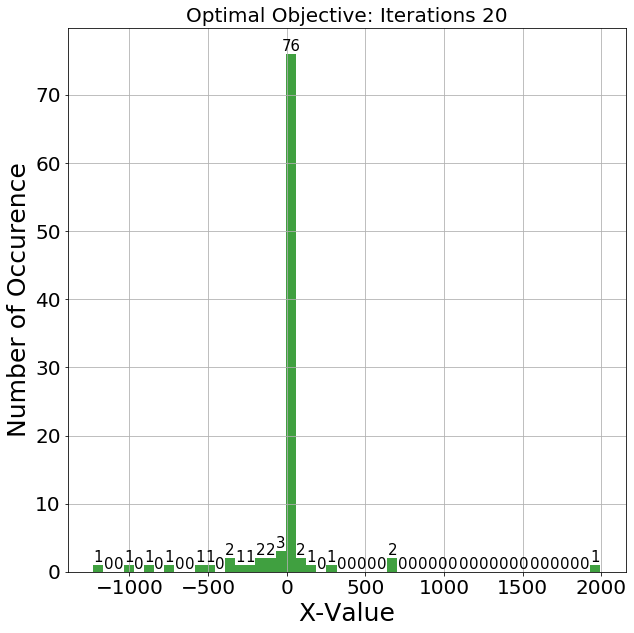

In [8]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
n, bins, patches = plt.hist(Store_Optimal_X[:,0], 50, facecolor='g', alpha=0.75)
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=15)
plt.xlabel('X-Value',fontsize=25)
plt.ylabel('Number of Occurence',fontsize=25)
plt.title('Optimal Objective: Iterations 20',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
autolabel(patches)
plt.show()

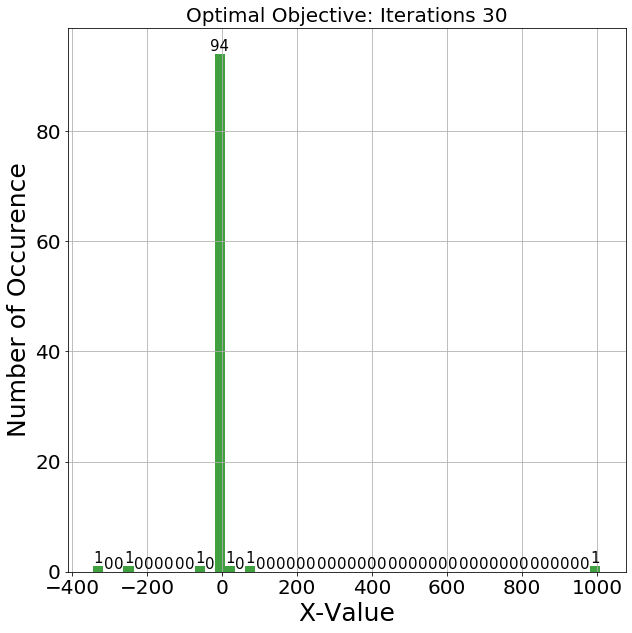

In [7]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
n, bins, patches = plt.hist(Store_Optimal_X[:,1], 50, facecolor='g', alpha=0.75)
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=15)
plt.xlabel('X-Value',fontsize=25)
plt.ylabel('Number of Occurence',fontsize=25)
plt.title('Optimal Objective: Iterations 30',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
autolabel(patches)
plt.show()

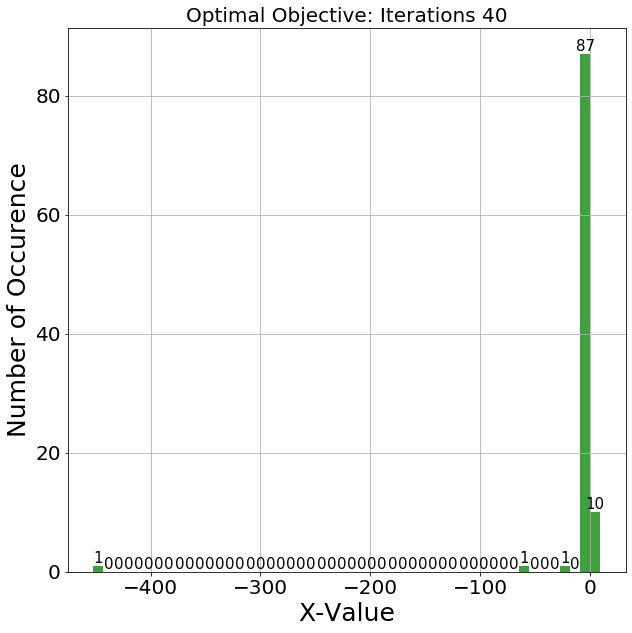

In [9]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
n, bins, patches = plt.hist(Store_Optimal_X[:,2], 50, facecolor='g', alpha=0.75)
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=15)
plt.xlabel('X-Value',fontsize=25)
plt.ylabel('Number of Occurence',fontsize=25)
plt.title('Optimal Objective: Iterations 40',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
autolabel(patches)
plt.show()

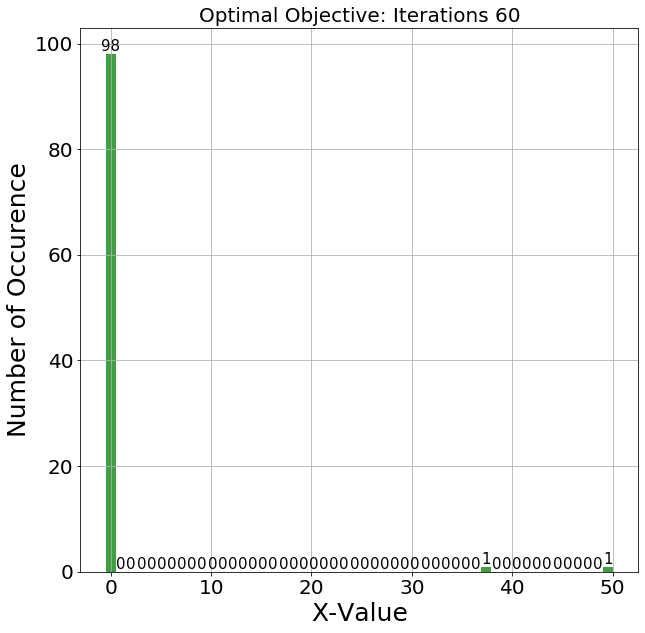

In [10]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
n, bins, patches = plt.hist(Store_Optimal_X[:,3], 50, facecolor='g', alpha=0.75)
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=15)
plt.xlabel('X-Value',fontsize=25)
plt.ylabel('Number of Occurence',fontsize=25)
plt.title('Optimal Objective: Iterations 60',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
autolabel(patches)
plt.show()